In [1]:
import pandas as pd
import numpy as np
import os

In [20]:
data_info_path = '/workspace/DataInfo/data_info_V_2022_04_27.csv'

In [21]:
data_info = pd.read_csv(data_info_path)

In [23]:
print(
f'''
data shape = {data_info.shape}, 
Unique case number = {data_info.Case.unique().size}
Cases per lesion type 
 S : {data_info.loc[data_info['Lesion Type']=='S'].Case.unique().size}
 L : {data_info.loc[data_info['Lesion Type']=='L'].Case.unique().size}
 M : {data_info.loc[data_info['Lesion Type']=='M'].Case.unique().size}

I/V ratio = {data_info.loc[data_info['I/V']=='I'].shape[0]} / {data_info.loc[data_info['I/V']=='V'].shape[0]}

Lesion info 
{data_info['Volume'].describe()}

Different case names: 
  Folder - CSV = {set(os.listdir('/workspace/BoneMeta_raw/label')) - set(data_info.Case.unique())}
  CSV - Folder = {set(data_info.Case.unique()) - set(os.listdir('/workspace/BoneMeta_raw/label'))}
'''
)



data shape = (2098, 22), 
Unique case number = 317
Cases per lesion type 
 S : 154
 L : 200
 M : 94

I/V ratio = 0 / 2098

Lesion info 
count    2098.000000
mean     1909.159342
std      2367.882925
min         0.000000
25%       135.575000
50%       903.600000
75%      2820.250000
max      9959.600000
Name: Lesion Size, dtype: float64

Different case names: 
  Folder - CSV = {'000009_20180417_Chest_CT_(contrast)', 'BH025_20191101_Abdomen_&_pelvis_CT_(3D)', '000332_20191025_Chest_CT_(contrast)', 'SN013_20190401_CT_Pelvis_&_Abdomen', '000452_20200513_Chest_CT_(contrast)', '000396_20200201_CT_Abdomen+Pelvis_Dynamic_(contrast)', '000308_20190801_CT_Abdomen+Pelvis_Post_(contrast)', '000510_20201120_Chest_CT_(contrast)', 'SN025_20200401_CT_Abdomen+Pelvis_Ar', 'BH018_20190801_Chest_CT_(contrast)_+_3D_(Breast_with_other_CT)', '000492_20210329_Chest_CT_(contrast)', '000566_20210526_CT_Abdomen+Pelvis_Post_(contrast)', '000565_20210806_Chest_CT_(contrast)', '000520_20200917_Chest_CT_(contrast)'

In [26]:
def show_hist(data_info, ax, type="All", log=False, n_bin = 30, title=''):
    if ax is None:
        ax = plt.gca()
    if log:
        if type == 'All':
            ax.hist(data_info['Volume'].apply(np.log), bins = n_bin, density=True)
        else:
            ax.hist(data_info.loc[data_info['Lesion Type']==type]['Volume'].apply(np.log), bins = n_bin, density=True)
    else:
        if type == 'All':
            ax.hist(data_info['Volume'], bins = n_bin, density=True)
        else:
            ax.hist(data_info.loc[data_info['Lesion Type']==type]['Volume'], bins = n_bin, density=True)
    
    ax.set_title(label = title)
    return ax

In [27]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'log All size'}>

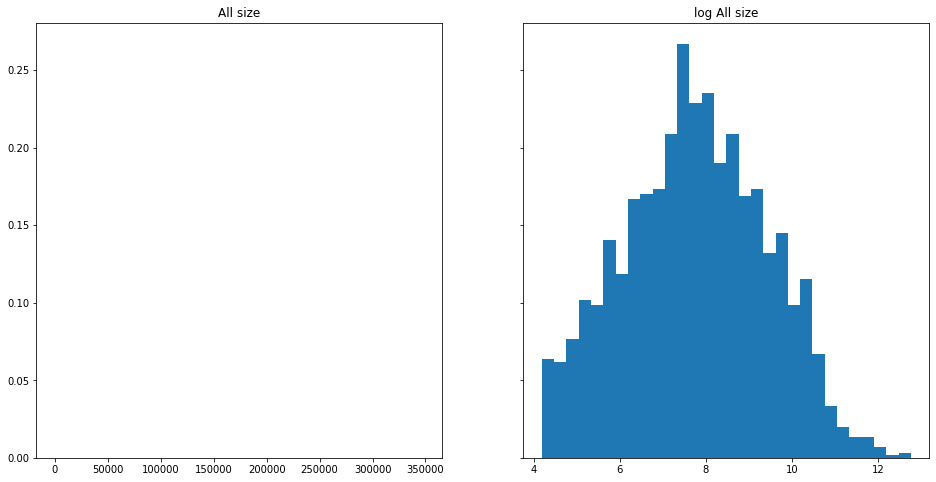

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8), sharey= True)
show_hist(data_info, axes[0], title='All size')
show_hist(data_info, axes[1], title='log All size', log=True)

<AxesSubplot:title={'center':'S size'}>

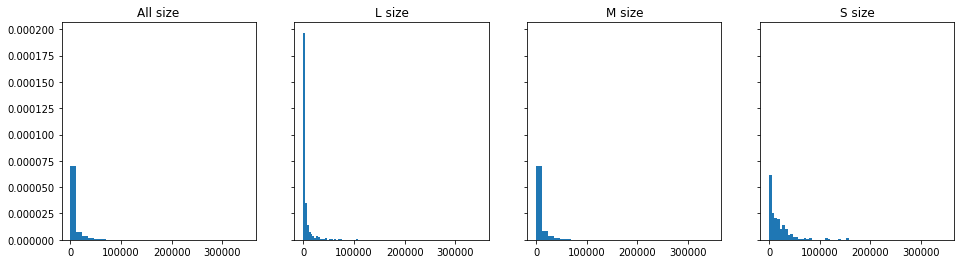

In [29]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(16,4), sharey= True, sharex=True)
show_hist(data_info, axes[0], title='All size')
show_hist(data_info, axes[1], type='S', title='L size')
show_hist(data_info, axes[2], type='L', title='M size')
show_hist(data_info, axes[3], type='M', title='S size')

<AxesSubplot:title={'center':'log M size'}>

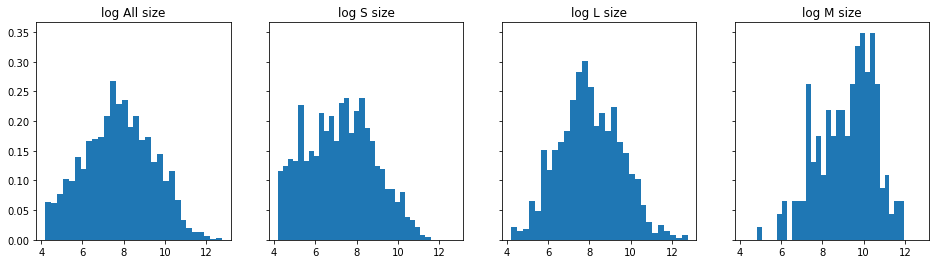

In [30]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(16,4), sharey= True,sharex= True)
show_hist(data_info, axes[0], title='log All size', log=True)
show_hist(data_info, axes[1], type='S', title='log S size', log=True)
show_hist(data_info, axes[2], type='L', title='log L size', log=True)
show_hist(data_info, axes[3], type='M', title='log M size', log=True)

<AxesSubplot:title={'center':'log M size'}>

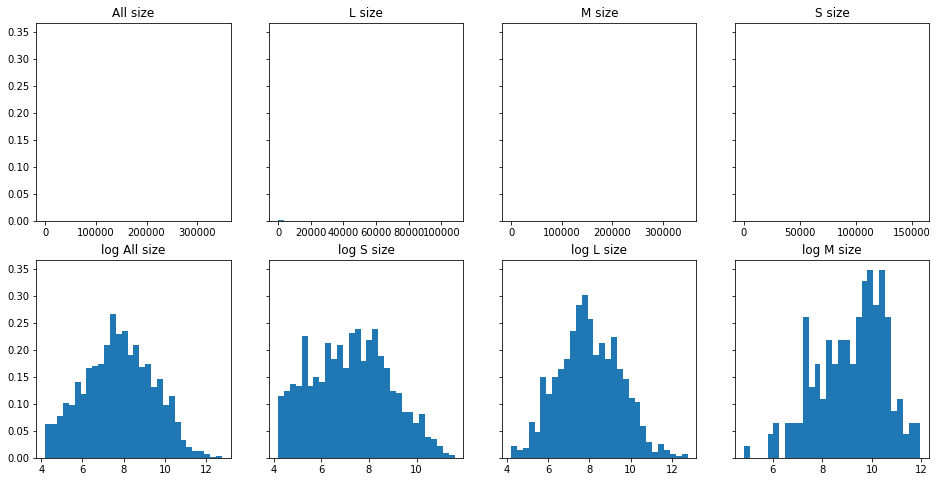

In [31]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(16,8), sharey= True)
show_hist(data_info, axes[0, 0], title='All size')
show_hist(data_info, axes[0, 1], type='S', title='L size')
show_hist(data_info, axes[0, 2], type='L', title='M size')
show_hist(data_info, axes[0, 3], type='M', title='S size')
show_hist(data_info, axes[1, 0], title='log All size', log=True)
show_hist(data_info, axes[1, 1], type='S', title='log S size', log=True)
show_hist(data_info, axes[1, 2], type='L', title='log L size', log=True)
show_hist(data_info, axes[1, 3], type='M', title='log M size', log=True)